### Introduction

Fire department response times are a critical metric for the efficiency of emergency services, especially in large urban environments like New York City. The time it takes for fire departments to respond to an incident can significantly impact the severity of damage and the number of lives saved. Understanding the factors that influence these response times can help improve operational efficiency and allocate resources more effectively.

This project leverages the Fire Incident Dispatch Data from NYC Open Data, which contains detailed information about over 11 million fire incidents in New York City. The data includes timestamps for when incidents are created and closed, the type of incidents, the resources assigned, and the response times of the fire department. By analyzing this dataset, we aim to predict whether a fire incident's response time is valid (i.e., within an acceptable time frame). This prediction will help inform decisions on resource allocation and response optimization, ultimately improving the fire department's efficiency.

We will use machine learning classification techniques to predict whether the response time is valid, based on various features such as the location of the incident, the type of emergency, and the resources assigned. The dataset’s large size and variety of features make it a valuable resource for understanding patterns in response times across New York City.

### Data Description

The Fire Incident Dispatch Data from NYC Open Data tracks fire incidents across New York City, providing over 11.1 million rows of data across 29 columns. This dataset includes information about when and where an incident occurs, the type of emergency, and how long it took for the fire department to respond. For this analysis, we focused on the following relevant features, which directly affect the fire department's response time and the validity of that response.

Relevant Features:

1. INCIDENT_BOROUGH:

    Description: Indicates the borough where the fire incident occurred (e.g., Manhattan, Brooklyn, Queens, Bronx, Staten Island).

    Relevance: The borough where an incident takes place can significantly affect the response time, as factors such as traffic, proximity to fire stations, and the density of buildings influence how quickly emergency services can respond.

    Cleaning: This column was retained after removing redundant columns like ALARM_BOX_BOROUGH, which contained the same information.

2. CALL_TYPE:

    Description: The type of emergency call (e.g., fire, medical emergency, medical first aid).

    Relevance: The type of emergency determines the resources required and can influence how quickly those resources are dispatched. For example, medical emergencies may have a different urgency compared to fire-related incidents.

    Cleaning: This categorical feature was retained to understand how different types of calls impact response times.

3. RESPONSE_TIME:

    Description: The time taken by the fire department to respond to the incident (in seconds).

    Relevance: This is the target variable for our analysis. The goal is to predict whether this response time is valid (i.e., within the required time frame) based on the features in the dataset.

    Cleaning: This numerical feature was retained for modeling purposes.

4. VALID_INCIDENT_RSPNS_TIME_INDC:

    Description: A binary feature indicating whether the incident's response time was valid (1 for valid, 0 for invalid).

    Relevance: This is the target variable for our classification model. We aim to predict whether the response time meets the required standards for a valid response.

    Cleaning: This feature was mapped from categorical ('Y', 'N') values to binary (1, 0) values for classification purposes.

5. RESOURCE_ASSIGNMENT:

    Description: Describes the number and type of resources assigned to the incident (e.g., engines, trucks, ambulances).

    Relevance: The quantity and type of resources dispatched to an incident can directly affect the response time. More resources may lead to a faster and more efficient response.

    Cleaning: These features were retained as numerical variables for modeling.

Additional Features:

6. ALARM_SOURCE_DESCRIPTION_TX:

    Description: Indicates the source of the fire alarm (e.g., phone call, private fire alarm).

    Relevance: The source of the alarm can influence how quickly the fire department is alerted and how rapidly they can respond. Some sources may provide more accurate or urgent information, leading to quicker responses.

    Cleaning: This categorical feature was encoded numerically for use in machine learning models.

7. INCIDENT_CLASSIFICATION_GROUP:

    Description: Categorizes the type of incident (e.g., medical emergencies, non-medical emergencies, structural fires).

    Relevance: Different types of incidents may require different types of responses. This feature helps to segment the data by incident type and understand how these types affect response times.

    Cleaning: This feature was retained and encoded numerically for use in the classification model.

8. ENGINES_ASSIGNED_QUANTITY:

    Description: The number of fire engines assigned to the incident.

    Relevance: The number of engines dispatched can significantly influence the time it takes for the fire department to respond, especially for larger fires or incidents requiring more equipment.

    Cleaning: This numerical feature was retained for modeling.

9. LADDERS_ASSIGNED_QUANTITY:

    Description: The number of ladder trucks assigned to the incident.

    Relevance: Ladder trucks are used for accessing high-rise buildings or performing rescues. Their assignment can influence the efficiency of the response and the speed at which operations are carried out.

    Cleaning: This feature was retained as part of the resource assignment variables.

10. OTHER_UNITS_ASSIGNED_QUANTITY:

    Description: The number of other units (e.g., ambulances, rescue units) assigned to the incident.

    Relevance: The number of additional units assigned to an incident could affect the speed of response, especially if the incident involves multiple types of emergencies or requires a large number of responders.

    Cleaning: This feature was retained as part of the resource assignment data.

### Data Cleaning

The dataset required several cleaning steps to prepare it for analysis. These steps ensured that the dataset was relevant, complete, and ready for modeling.

To start, we imported the dependencies that we would need and read the csv file into a dataframe.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
df = pd.read_csv(r"C:\Users\Jason\Downloads\Fire_Incident_Dispatch_Data_20250408.csv")
total_rows = df.shape[0]

C:\Users\Jason\AppData\Local\Temp\ipykernel_17508\1139139912.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\Jason\Downloads\Fire_Incident_Dispatch_Data_20250408.csv")


1. Dropping Columns:

    Irrelevant Columns:

    Columns like ZIPCODE, POLICEPRECINCT, CITYCOUNCILDISTRICT, and others were removed because they did not contribute meaningful information to the prediction of response time validity.


    DateTime Columns: 

    Columns with datetime values, such as FIRST_ASSIGNMENT_DATETIME and FIRST_ACTIVATION_DATETIME, were dropped because they were not useful for predicting response time validity. The only column kept was INCIDENT_DATETIME, as this will be converted to a categorical variable later and used as a feature
    

    Time Columns:

    Columns that were representitive of the time it took to fire department to accomplish something, were dropped. This is because their correlation was too high and they were too strong of a predictor of whether or not the response time was valid

In [2]:
# Dropping unnecessary columns that contained no useful information
df.drop(columns=['STARFIRE_INCIDENT_ID', 'ZIPCODE', 'POLICEPRECINCT', 'CITYCOUNCILDISTRICT', 'COMMUNITYDISTRICT', 'COMMUNITYSCHOOLDISTRICT', 'CONGRESSIONALDISTRICT', 'ALARM_BOX_NUMBER', 'ALARM_BOX_LOCATION', 'INCIDENT_CLASSIFICATION', 'ALARM_LEVEL_INDEX_DESCRIPTION', 'HIGHEST_ALARM_LEVEL', 'VALID_DISPATCH_RSPNS_TIME_INDC'], inplace=True)
#Dropping most columns with DateTime data types, the other one will be converted to a categorical variable later
df.drop(columns=['FIRST_ASSIGNMENT_DATETIME', 'FIRST_ACTIVATION_DATETIME', 'FIRST_ON_SCENE_DATETIME', 'INCIDENT_CLOSE_DATETIME'], inplace=True)
# Dropping the column for INCIDENT_TRAVEL_TIME adnd INCIDENT_RESPONSE_SECONDS_QY, as they are mostly out of our control and will have too great of an impact on the model
df.drop(columns=['INCIDENT_TRAVEL_TM_SECONDS_QY', 'INCIDENT_RESPONSE_SECONDS_QY', 'DISPATCH_RESPONSE_SECONDS_QY'], inplace=True)

2. Handling Missing Data:

    Rows with missing values (about 4% of the dataset) were dropped to maintain data integrity, as this small amount of missing data would not significantly affect the analysis.

In [3]:
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]
print(missing_counts)
# We can see that the rows with missing values only account for around 4% of the total rows, so we can drop them without losing too much data.
df.dropna(inplace=True)
print(f"Percentage of remaining rows: {df.shape[0] / total_rows * 100:.2f}%")

ALARM_BOX_BOROUGH                   2
ENGINES_ASSIGNED_QUANTITY        1584
LADDERS_ASSIGNED_QUANTITY        1584
OTHER_UNITS_ASSIGNED_QUANTITY    1584
dtype: int64
Percentage of remaining rows: 99.98%


3. Mapping Categorical Variables:

    The VALID_INCIDENT_RSPNS_TIME_INDC column, which indicates whether the response time was valid, was mapped from categorical values ('Y', 'N') to binary (1, 0) for classification modeling.

In [4]:
# Remapping the values in VALID_INCIDENT_RSPNS_TIME_INDC
df['VALID_INCIDENT_RSPNS_TIME_INDC'] = df['VALID_INCIDENT_RSPNS_TIME_INDC'].map({'Y': 1, 'N': 0})

4. Combining Redundant Columns:

    The ALARM_BOX_BOROUGH and INCIDENT_BOROUGH columns were found to be identical, so ALARM_BOX_BOROUGH was removed to avoid redundancy.

In [5]:
# Checking to see if the ALARM_BOX_BOROUGH and INCIDENT_BOROUGH columns are equal enough to be used as a single column, they are comepletley equal, so they will be combined
print((df['ALARM_BOX_BOROUGH'] == df['INCIDENT_BOROUGH']).value_counts())
df.drop(columns=['ALARM_BOX_BOROUGH'], inplace=True)

True    10273506
Name: count, dtype: int64


5. Converting the INCIDENT_DATETIME column to a categorical variable

    To get a better understanding of how the time of the incident impacts the validity of the response time, the INCIDENT_DATETIME column was converted into a categorical variable reresentitive of which 4-hour period of time it fall within. This was done by first extracting the hour from the datetime data and finding the value counts for this data. The counts of each hour value was used to find the optimal grouping, where each hour within each group had counts most similar to the other hours in its group


In [6]:
# Convert string to datetime
df['INCIDENT_DATETIME'] = pd.to_datetime(df['INCIDENT_DATETIME'], format="%m/%d/%Y %I:%M:%S %p")

# Extract hour in 24-hour format
df['INCIDENT_HOUR'] = df['INCIDENT_DATETIME'].dt.hour
df.drop(columns=['INCIDENT_DATETIME'], inplace=True)

# Function to convert 24-hour format to AM/PM format for labels
def hour_to_ampm(h):
    suffix = "AM" if h < 12 or h == 24 else "PM"
    hour12 = h % 12
    if hour12 == 0:
        hour12 = 12
    return f"{hour12} {suffix}"

def assign_optimal_hour_groups(df, hour_col='INCIDENT_HOUR', group_col='HOUR GROUP'):

    # Function to create the hour groupings that will be checked
    def get_hour_groups(start):
        hours = [(start + i) % 24 for i in range(24)]
        return [hours[i:i+4] for i in range(0, 24, 4)]

    # Precompute value counts of each hour
    hour_counts = df[hour_col].value_counts().reindex(range(24), fill_value=0)

    best_std = np.inf
    best_groups = None

    # Checking all possible hour groupings to find the one with the lowest standard deviation
    for start in range(24):
        groups = get_hour_groups(start)
        group_totals = [hour_counts[group].sum() for group in groups]
        std = np.std(group_totals, ddof=0)
        if std < best_std:
            best_std = std
            best_groups = groups

    # Create mapping from hour to group index + label
    hour_to_group = {}
    hour_to_label = {}

    # Creating and assigning the labels for each group
    for i, group in enumerate(best_groups):
        for hour in group:
            hour_to_group[hour] = i
            start_hour = group[0]
            end_hour = group[-1]
            label = f"{hour_to_ampm(start_hour)} - {hour_to_ampm((end_hour + 1) % 24)}"
            hour_to_label[hour] = label

    df[group_col] = df[hour_col].map(hour_to_group)
    df[f"{group_col} LABEL"] = df[hour_col].map(hour_to_label)

    print(f"Best grouping: {best_groups} with Std Dev: {best_std:.2f}")

    return df, best_groups

df, best_groups = assign_optimal_hour_groups(df)

Best grouping: [[2, 3, 4, 5], [6, 7, 8, 9], [10, 11, 12, 13], [14, 15, 16, 17], [18, 19, 20, 21], [22, 23, 0, 1]] with Std Dev: 503556.97


7. Target Encoding for Categorical Variables:

    For categorical features INCIDENT_BOROUGH, ALARM_SOURCE_DESCRIPTION_TX, INCIDENT_CLASSIFICATION_GROUP, and HOUR GROUP LABEL target encoding was applied to convert them into numerical formats suitable for modeling. All of the counts for the values in these columns are over 5000, any values found with a count of less than 5000 (Only found in ALARM_SOURCE_DESCRIPTION_TX) were dropped as they made up an insignifigant amount of the dataset, and would not terget encoded as accurately. K-fold cross validation was used in this function to prevent overfitting. All of the strings in these columns were also converted to lower case, to combine certain instances values with different cases, such as the instances of "Phone" and "PHONE" in the Alarm Source column.

In [7]:
# Target Encoding for Categorical Variables using Stratified K-Folds

def target_encode(df, col, target='VALID_INCIDENT_RSPNS_TIME_INDC', n_splits=10, alpha=10):

    df = df.copy()
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    encoded = pd.Series(index=df.index, dtype=float)
    
    global_mean = df[target].mean()

    for train_idx, val_idx in skf.split(df, df[target]):
        train, val = df.iloc[train_idx], df.iloc[val_idx]

        # Compute smoothed means
        category_stats = train.groupby(col)[target].agg(['mean', 'count'])
        smooth = (category_stats['count'] * category_stats['mean'] + alpha * global_mean) / (category_stats['count'] + alpha)

        # Map to validation fold
        encoded.iloc[val_idx] = val[col].map(smooth).fillna(global_mean)

    return encoded

# Converting all strings to the same case
df['INCIDENT_BOROUGH'] = df['INCIDENT_BOROUGH'].str.lower()
df['ALARM_SOURCE_DESCRIPTION_TX'] = df['ALARM_SOURCE_DESCRIPTION_TX'].str.lower()
df['INCIDENT_CLASSIFICATION_GROUP'] = df['INCIDENT_CLASSIFICATION_GROUP'].str.lower()
# Target Encoding for categorical variables
df['Borough num'] = target_encode(df, 'INCIDENT_BOROUGH')
df['Alarm Source num'] = target_encode(df, 'ALARM_SOURCE_DESCRIPTION_TX')
df['Incident Classification num'] = target_encode(df, 'INCIDENT_CLASSIFICATION_GROUP')
df['Time num'] = target_encode(df, 'HOUR GROUP LABEL')

8. Renaming and reordering Columns:

    To make the columns more readable and easier to work with, we renamed the columns with more intuitive names and reordered them.

In [8]:
# Renaming columns to make them easier to read and work with
df.rename(columns={'INCIDENT_BOROUGH': 'Borough', 'ALARM_SOURCE_DESCRIPTION_TX': 'Alarm Source', 'INCIDENT_CLASSIFICATION_GROUP': 'Incident Classification', 'VALID_INCIDENT_RSPNS_TIME_INDC': 'Valid Response Time', 'ENGINES_ASSIGNED_QUANTITY': 'Engines Assigned', 'LADDERS_ASSIGNED_QUANTITY': 'Ladders Assigned', 'OTHER_UNITS_ASSIGNED_QUANTITY': 'Other Units Assigned', 'HOUR GROUP LABEL' : 'Time'}, inplace=True)
order = ['Borough', 'Borough num', 'Time', 'Time num',  'Alarm Source', 'Alarm Source num', 'Incident Classification', 'Incident Classification num', 'Engines Assigned', 'Ladders Assigned', 'Other Units Assigned', 'Valid Response Time']
df = df[order]

After completing the data cleaning steps, the dataset was reduced to 7 relevant features, all of which contribute to predicting the validity of fire department response times. The dataset is now prepared for Exploratory Data Analysis (EDA) and model development.

In [9]:
df.head()

,Borough,Borough num,Time,Time num,Alarm Source,Alarm Source num,Incident Classification,Incident Classification num,Engines Assigned,Ladders Assigned,Other Units Assigned,Valid Response Time
0,richmond / staten island,0.840865,10 PM - 2 AM,0.806870,phone,0.950974,nonmedical emergencies,0.946426,1.0,1.0,0.0,1
1,bronx,0.791765,10 PM - 2 AM,0.806925,pd link/medical,0.687134,medical mfas,0.872033,1.0,0.0,0.0,1
2,brooklyn,0.831397,10 PM - 2 AM,0.806751,pd link/medical,0.686877,medical emergencies,0.640480,1.0,0.0,0.0,1
3,queens,0.819330,10 PM - 2 AM,0.806698,phone,0.950935,nonmedical mfas,0.948309,3.0,2.0,1.0,1
4,queens,0.819449,10 PM - 2 AM,0.806870,private fire alarm,0.985767,nonmedical emergencies,0.946426,1.0,1.0,1.0,1


### Exploratory Data Analysis

To start, we imported the necessary dependencies to create the classification models and the tools to analyze and visualize those models

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

We then split our data into training and testing data to be able to create our classification models

In [14]:
X = df.drop(columns=['Valid Response Time', 'Borough', 'Time', 'Alarm Source', 'Incident Classification'])
y = df['Valid Response Time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We then created all 4 our of classification models. We recorded the accuracy of all of these models to ensure that all of the models would be accurate enough to justify using the feature importance from the models

In [15]:
# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred)
precision_dt = precision_score(y_test, y_pred, average='binary')
recall_dt = recall_score(y_test, y_pred, average='binary')
f1_dt = f1_score(y_test, y_pred, average='binary')

# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred, average='binary')
recall_rf = recall_score(y_test, y_pred, average='binary')
f1_rf = f1_score(y_test, y_pred, average='binary')

# Gradient Boosting Classifier
gb = GradientBoostingClassifier(n_estimators=10, learning_rate= 0.05, random_state=42, max_features=6)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred)
precision_gb = precision_score(y_test, y_pred, average='binary')
recall_gb = recall_score(y_test, y_pred, average='binary')
f1_gb = f1_score(y_test, y_pred, average='binary')

# Ada Boost Classifier
ab = AdaBoostClassifier(n_estimators=10, random_state=42)
ab.fit(X_train, y_train)
y_pred = ab.predict(X_test)
accuracy_ab = accuracy_score(y_test, y_pred)
precision_ab = precision_score(y_test, y_pred, average='binary')
recall_ab = recall_score(y_test, y_pred, average='binary')
f1_ab = f1_score(y_test, y_pred, average='binary')

After creating all of the models, we then looked at all of the performance metrics of each model. We can see that the performance metrics for all of the models are very similar. This allows us to take the feature importance of all of the models into account.

In [16]:
metrics = {
    'Model': ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'Ada Boost'],
    'Accuracy': [accuracy_dt, accuracy_rf, accuracy_gb, accuracy_ab],
    'Precision': [precision_dt, precision_rf, precision_gb, precision_ab],
    'Recall': [recall_dt, recall_rf, recall_gb, recall_ab],
    'F1 Score': [f1_dt, f1_rf, f1_gb, f1_ab]
}
metrics = pd.DataFrame(metrics)
metrics

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.815430,0.827666,0.973179,0.894544
1,Random Forest,0.816580,0.827671,0.974976,0.895305
2,Gradient Boosting,0.804392,0.804392,1.000000,0.891593
3,Ada Boost,0.812282,0.820933,0.980509,0.893653


C:\Users\Jason\AppData\Local\Temp\ipykernel_17508\2178062603.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment = "right")


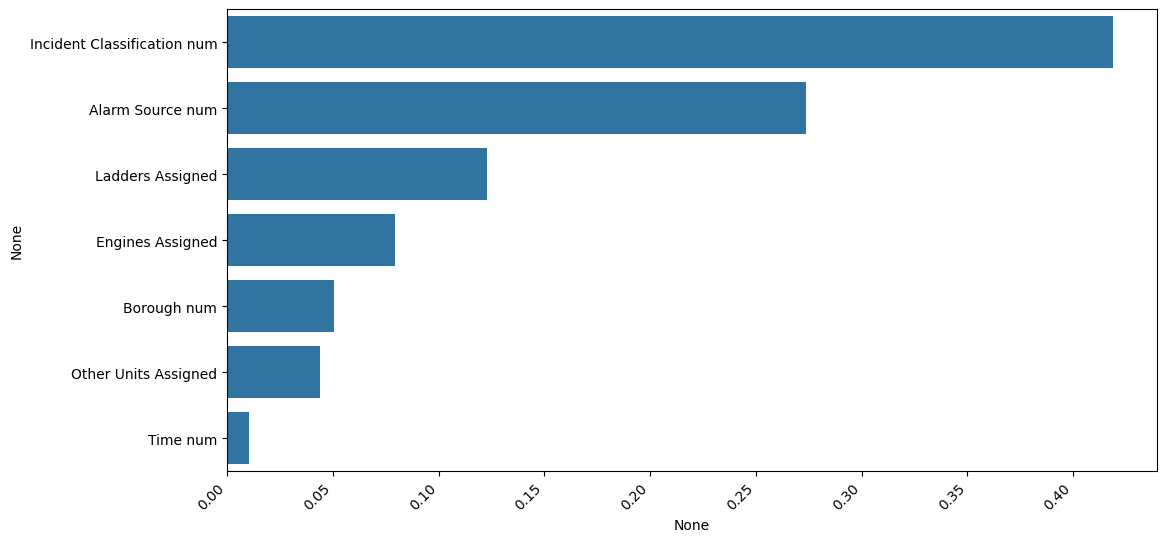

In [21]:
# Feature Importances

fi_dt = dt.feature_importances_
fi_rf = rf.feature_importances_
fi_gb = gb.feature_importances_
fi_ab = ab.feature_importances_

fi_avg = (fi_dt + fi_rf + fi_gb + fi_ab) / 4
fi_avg = pd.Series(fi_avg, index=X.columns).sort_values(ascending=False)

plt.figure(figsize = (12,6))
chart = sns.barplot(x = fi_avg, y = fi_avg.index)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment = "right")
plt.show()

From this, we can see that the most important features are "Incident Classification" and "Alarm Source". Both of these varibles have been target endcoded earlier on, meaning that the target encoded value of each instance in the column is representitive of how likley a response time is to be valid based on that value alone. This being said, looking at the target encoded values that are the lowest will give un insight into what specificaly will need to be imporved, as an answer to our reseach question

In [22]:
alarm_source_val = df.groupby('Alarm Source')['Alarm Source num'].mean().reset_index()
alarm_source_val.sort_values(['Alarm Source num'], ascending=True, inplace=True)
alarm_source_val

,Alarm Source,Alarm Source num
6,ems,0.486769
8,ems-911,0.510205
1,911 text,0.654835
7,ems link/medical,0.670871
15,sol,0.681449
12,pd link/medical,0.686978
5,default record,0.693921
11,ers-nc,0.758593
17,verbal,0.786136
0,911,0.802290


In [23]:
incident_classification_val = df.groupby('Incident Classification')['Incident Classification num'].mean().reset_index()
incident_classification_val.sort_values(['Incident Classification num'], ascending=True, inplace=True)
incident_classification_val

,Incident Classification,Incident Classification num
0,medical emergencies,0.640468
1,medical mfas,0.871856
4,nonstructural fires,0.925076
2,nonmedical emergencies,0.946412
3,nonmedical mfas,0.948335
5,structural fires,0.967511
